In [226]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movies_train_data = pd.read_csv('../korea_movies_box_off_num/movies_train.csv')
movies_test_data = pd.read_csv('../korea_movies_box_off_num/movies_test.csv')
submission_data = pd.read_csv('../korea_movies_box_off_num/submission.csv')
movies_train_data.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868


In [227]:
#movies_test_data['genre'].value_counts()
#movies_train_data['genre'].value_counts()

In [228]:
movies_train_data.groupby(['genre'])['box_off_num'].mean()

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64

In [229]:
movies_train_data['genre']=movies_train_data['genre'].map({'SF':1.788346e+06, '공포':5.908325e+05, '느와르':2.263695e+06,
                                                           '다큐멘터리':6.717226e+04,'드라마':6.256898e+05,'멜로/로맨스':4.259680e+05,
                                                           '뮤지컬':6.627000e+03,'미스터리':5.275482e+05,'서스펜스':8.261100e+04, 
                                                           '애니메이션':1.819267e+05,'액션':2.203974e+06,'코미디':1.193914e+06})

movies_test_data['genre']=movies_test_data['genre'].map({'SF':1.788346e+06, '공포':5.908325e+05, '느와르':2.263695e+06,
                                                           '다큐멘터리':6.717226e+04,'드라마':6.256898e+05,'멜로/로맨스':4.259680e+05,
                                                           '뮤지컬':6.627000e+03,'미스터리':5.275482e+05,'서스펜스':8.261100e+04, 
                                                           '애니메이션':1.819267e+05,'액션':2.203974e+06,'코미디':1.193914e+06})

In [230]:
movies_train_data.groupby(['screening_rat'])['box_off_num'].mean()

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64

In [231]:
movies_train_data['screening_rat']=movies_train_data['screening_rat'].map({'12세 관람가':8.449809e+05,'15세 관람가':1.247519e+06,
                                                                           '전체 관람가':1.351005e+05,'청소년 관람불가':3.641813e+05})

movies_test_data['screening_rat']=movies_test_data['screening_rat'].map({'12세 관람가':8.449809e+05,'15세 관람가':1.247519e+06,
                                                                           '전체 관람가':1.351005e+05,'청소년 관람불가':3.641813e+05})

In [232]:
#movies_train_data['release_time']

In [233]:
#movies_train_data['release_time'] = movies_train_data.groupby(['release_time'])['box_off_num'].mean()

In [234]:
#movies_train_data.groupby(['distributor'])['box_off_num'].mean()

In [235]:
del movies_train_data['release_time']
del movies_test_data['release_time']
del movies_train_data['director']
del movies_test_data['director']
del movies_train_data['distributor']
del movies_test_data['distributor']
del movies_train_data['title']
del movies_test_data['title']

#del movies_train_data['genre']
#del movies_test_data['genre']
#del movies_train_data['screening_rat']
#del movies_test_data['screening_rat']

In [236]:
#movies_test_data['genre'].value_counts()
#movies_train_data['genre'].value_counts()
movies_train_data.shape
movies_test_data.shape

(243, 8)

In [237]:
movies_train_targets_data = movies_train_data['box_off_num']
movies_test_targets_data = movies_test_data['box_off_num']

movies_train_data = movies_train_data.iloc[:,0:7] #target 값인 box_off_num값을 빼고 저장
movies_test_data = movies_test_data.iloc[:,0:7] #target 값인 box_off_num값을 빼고 저장

In [238]:
mean = movies_train_data.mean(axis=0)
movies_train_data -= mean
std =  movies_train_data.std(axis=0)
movies_train_data /= std

movies_test_data -= mean
movies_test_data /= std

In [239]:
mean

genre             708181.748467
time                 100.863333
screening_rat     708181.868333
dir_prev_bfnum    472699.301139
dir_prev_num           0.876667
num_staff            151.118333
num_actor              3.706667
dtype: float64

In [240]:
movies_train_data.shape
movies_test_data.shape

(243, 7)

In [241]:
movies_train_data.head(10)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,2.515658,-0.268729,-0.785019,-0.360984,-0.740798,-0.362914,-0.697484
1,2.616098,1.609980,-0.785019,0.526091,0.949235,1.423936,-0.288802
2,2.515658,1.223187,1.230783,-0.192386,2.639268,1.158323,0.119880
3,0.816916,0.007552,-1.307788,-0.342737,0.949235,-0.791516,0.937244
4,0.816916,0.394345,1.230783,-0.360983,0.104219,0.602951,-0.697484
5,0.816916,0.670626,1.230783,0.278944,0.949235,0.669354,0.119880
6,-1.078064,0.173320,-1.307788,-0.360984,-0.740798,-0.719076,0.528562
7,2.515658,-0.268729,-0.785019,0.203763,1.794252,1.152287,-0.697484
8,-1.179891,1.554724,-1.307788,-0.360984,-0.740798,-0.894139,0.528562
9,-0.138737,-0.379241,1.230783,-0.360984,-0.740798,-0.079191,-0.288802


In [242]:
#movies_train_data = pd.DataFrame(movies_train_data, columns = ['title', 'distributor', 'director', 'genre', 'time', 'screening_rat', 
#                                                               'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor'] )

#movies_test_data = pd.DataFrame(movies_test_data, columns = ['title', 'distributor', 'director', 'genre', 'time', 'screening_rat', 
#                                                               'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor'] )

In [243]:
movies_train_targets_data.head(10)

0      23398
1    7072501
2    6959083
3     217866
4     483387
5     233211
6      53526
7    1110523
8       4778
9        868
Name: box_off_num, dtype: int64

In [244]:
movies_test_targets_data.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: box_off_num, dtype: int64

In [245]:
movies_train_data.head(10)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,2.515658,-0.268729,-0.785019,-0.360984,-0.740798,-0.362914,-0.697484
1,2.616098,1.609980,-0.785019,0.526091,0.949235,1.423936,-0.288802
2,2.515658,1.223187,1.230783,-0.192386,2.639268,1.158323,0.119880
3,0.816916,0.007552,-1.307788,-0.342737,0.949235,-0.791516,0.937244
4,0.816916,0.394345,1.230783,-0.360983,0.104219,0.602951,-0.697484
5,0.816916,0.670626,1.230783,0.278944,0.949235,0.669354,0.119880
6,-1.078064,0.173320,-1.307788,-0.360984,-0.740798,-0.719076,0.528562
7,2.515658,-0.268729,-0.785019,0.203763,1.794252,1.152287,-0.697484
8,-1.179891,1.554724,-1.307788,-0.360984,-0.740798,-0.894139,0.528562
9,-0.138737,-0.379241,1.230783,-0.360984,-0.740798,-0.079191,-0.288802


In [246]:
movies_train_data.shape

(600, 7)

In [247]:
movies_test_data.shape

(243, 7)

In [248]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러번 만들꺼니까 함수로 만들자 ㅇㅇ
    model =  models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(movies_train_data.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse' , metrics=['mae'])
    return model

In [249]:
k = 4
num_val_samples = len(movies_train_data) // k # // 은 나머지를 없앰
num_epochs = 100 # 공부 반복횟수
all_scores = [] # 점수를 저장할 배열
all_mae_histories = [] # 그래프값으로 띄울 걸 저장하는 배열
loss_all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = movies_train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = movies_train_targets_data[i*num_val_samples: (i+1)*num_val_samples]
    
    # 훈련 데이터 준비 : 다른분할 전체 
    # target_data 를 fit 할때는 빼줘야함 ㅇㅇ 중요!
    partial_movies_train_data = np.concatenate(
        [movies_train_data[:i*num_val_samples],
         movies_train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_movies_train_targets_data = np.concatenate(
        [movies_train_targets_data[:i*num_val_samples],
         movies_train_targets_data[(i+1)*num_val_samples:]],
        axis=0) 
    
    #케라스 모델 구성 컴파일 포함
    model =  build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다. 보고싶으면 1로 ㄱㄱ)
    history = model.fit(partial_movies_train_data, partial_movies_train_targets_data,
             epochs=num_epochs, batch_size=50, verbose=0 , 
              validation_data = (val_data, val_targets))

    #검증 세트로 모델 평가
    test_mse, test_mae = model.evaluate(movies_test_data, movies_test_targets_data, verbose=1)
    all_scores.append(test_mae)
    
    # 그래프를 그리기 위해 history 에 저장
    
    mae_history = history.history['val_mean_absolute_error'] # 에러를 따로 뽑아서 overfitting 여부를 
    # 알아내려고 값을 저장
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
243/243 [==============================] - 0s 29us/step
처리중인 폴드 # 1
243/243 [==============================] - 0s 29us/step
처리중인 폴드 # 2
243/243 [==============================] - 0s 33us/step
처리중인 폴드 # 3
243/243 [==============================] - 0s 29us/step


In [250]:
model.predict(movies_test_data)

array([[ 380.61957  ],
       [ 250.23256  ],
       [ 479.37076  ],
       [ 494.58734  ],
       [ 209.76477  ],
       [  57.045258 ],
       [  21.597685 ],
       [  34.69143  ],
       [   8.502468 ],
       [ 208.79807  ],
       [ 246.94063  ],
       [ 220.8161   ],
       [ 380.8046   ],
       [  85.82461  ],
       [ 183.69379  ],
       [ 533.5495   ],
       [ 108.71333  ],
       [  82.152214 ],
       [  95.38474  ],
       [  38.247963 ],
       [  39.3988   ],
       [  33.79457  ],
       [ 171.45065  ],
       [ 225.21454  ],
       [  32.517178 ],
       [ 638.2109   ],
       [  15.217551 ],
       [ 117.1375   ],
       [  35.09443  ],
       [  27.79374  ],
       [  75.438484 ],
       [  13.6918335],
       [  58.279926 ],
       [ 469.4132   ],
       [  26.449389 ],
       [  30.527514 ],
       [  21.679062 ],
       [  29.970055 ],
       [  27.797352 ],
       [  20.490885 ],
       [  67.56864  ],
       [  61.17139  ],
       [ 224.32188  ],
       [ 26

In [251]:
all_scores

[256.7488124517747, 416.2106747725373, 277.84566168137536, 175.58995501985274]

In [224]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

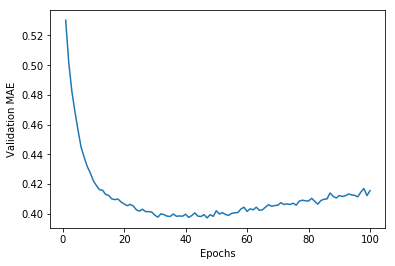

In [225]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()